Pada Poin2.ipynb ini, saya melakukan proses regresi dengan membangun model ANN terlebih dahulu. Dataset yang digunakan adalah dataset pada tugas sebelumnya yaitu : https://www.kaggle.com/datasets/mrsimple07/laptoppriceprediction/data

Kode dibawah untuk melakukan prediksi pada harga laptop berdasarkan fitur-fitur yang ada pada data.

## Import Library

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.svm import SVR

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

2024-04-16 20:10:49.133909: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-16 20:10:49.187449: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-16 20:10:49.188388: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-16 20:10:50.268987: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## Loading Data

Dataset yang belum dipreprocessing terletak pada folder data.

In [3]:
df = pd.read_csv('data/Laptop_price.csv')

In [4]:
df.head()

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,Asus,3.830296,16,512,11.185147,2.641094,17395.093065
1,Acer,2.912833,4,1000,11.311372,3.260012,31607.605919
2,Lenovo,3.241627,4,256,11.853023,2.029061,9291.023542
3,Acer,3.806248,16,512,12.280360,4.573865,17436.728334
4,Acer,3.268097,32,1000,14.990877,4.193472,32917.990718


In [5]:
print(df.shape)

(1000, 7)


In [6]:
df.isna().sum()

Brand               0
Processor_Speed     0
RAM_Size            0
Storage_Capacity    0
Screen_Size         0
Weight              0
Price               0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             1000 non-null   object 
 1   Processor_Speed   1000 non-null   float64
 2   RAM_Size          1000 non-null   int64  
 3   Storage_Capacity  1000 non-null   int64  
 4   Screen_Size       1000 non-null   float64
 5   Weight            1000 non-null   float64
 6   Price             1000 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 54.8+ KB


## Preprocessing Data

Proses ini untuk melihat sebaran data yang ada dan perubahan apa yang sebaiknya dilakukan agar data semakin bersih dan siap digunakan pada proses pembuatan model.

In [8]:
df.describe()

,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.750611,15.500000,584.576000,14.056790,3.466919,19604.187963
std,0.731796,10.988665,313.438517,1.705882,0.866541,9406.064880
min,1.511580,4.000000,256.000000,11.012111,2.000560,8570.012950
25%,2.089246,8.000000,256.000000,12.635523,2.717211,10114.012948
50%,2.760885,16.000000,512.000000,14.099643,3.464630,17287.241878
75%,3.362610,32.000000,1000.000000,15.528590,4.212583,31566.214754
max,3.998534,32.000000,1000.000000,16.985737,4.990728,33503.935037


Melihat penyebaran brand yang ada pada data. 

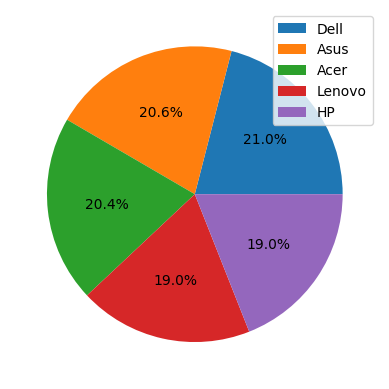

In [9]:
count = df["Brand"].value_counts()
plt.pie(count, autopct="%0.1f%%")
plt.legend(count.index)
plt.show()

Mengkonversi isi kolom Brand menjadi numerik.

In [11]:
le = LabelEncoder()
df["Brand"] = le.fit_transform(df["Brand"])

Melihat korelasi antar fitur.

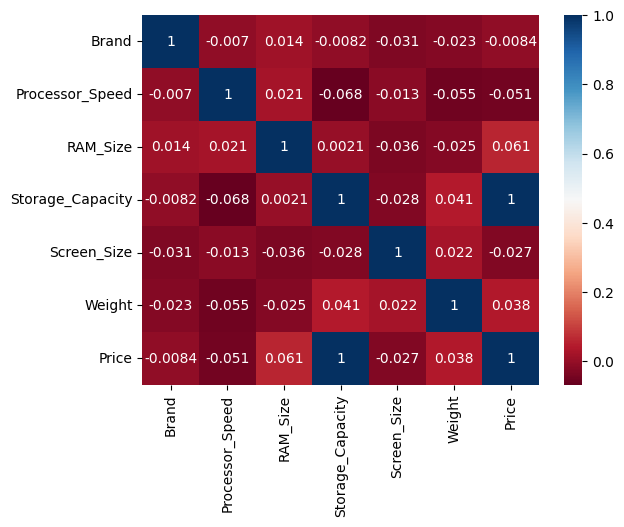

In [12]:
sns.heatmap(df.corr(), annot=True, cmap="RdBu")
plt.show()

Melakukan feature scaling agar feature yang dipakai adalah feature yang benar benar mempengaruhi.

In [13]:
data = df.values
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

In [14]:
df.head()

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,1,3.830296,16,512,11.185147,2.641094,17395.093065
1,0,2.912833,4,1000,11.311372,3.260012,31607.605919
2,4,3.241627,4,256,11.853023,2.029061,9291.023542
3,0,3.806248,16,512,12.280360,4.573865,17436.728334
4,0,3.268097,32,1000,14.990877,4.193472,32917.990718


## Splitting Data

In [15]:
x = data[:, :-1]
y = data[:, -1]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(800, 6)
(200, 6)
(800,)
(200,)


Normalisasi isi dari fitur-fitur.

In [17]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)
print(X_train)
print(X_test)

[[-0.6532877   1.45229826 -0.66915921  1.32453125 -0.7056372  -1.53945957]
 [-1.36145864  0.76096741  0.06116462 -0.23860205  0.62999571 -1.03363739]
 [ 0.76305419 -0.43096543 -1.03432112 -0.23860205  0.5730505  -1.40849657]
 ...
 [ 0.05488325  0.19110139 -1.03432112  1.32453125 -1.51851557  1.70120786]
 [-0.6532877  -0.9246802  -1.03432112 -1.0586064   0.78931909 -0.5646051 ]
 [-0.6532877  -1.67216694  1.52181227 -1.0586064  -0.28050891  0.55610987]]
[[ 0.05488325  0.80364802  1.52181227 -1.0586064   1.29785831 -0.86625791]
 [-0.6532877  -0.77766747 -0.66915921  1.32453125 -0.62388873 -1.59969715]
 [ 0.76305419 -1.09283338  0.06116462 -1.0586064   0.44256385 -1.49566682]
 ...
 [-0.6532877   1.06195456  1.52181227 -1.0586064  -1.05124127 -0.35729555]
 [ 1.47122514  1.27457007  1.52181227  1.32453125 -1.34391535 -0.47340209]
 [-0.6532877  -1.62949773  1.52181227 -0.23860205  1.41369085 -1.12663093]]


## Build a SVR Model

In [18]:
# Inisialisasi model SVR dengan kernel RBF dan parameter C=0.9
model_svr = SVR(kernel='linear', C=0.9)

# Latih model SVR
model_svr.fit(X_train, y_train)

# Prediksi dengan data uji
y_pred = model_svr.predict(X_test)

# Evaluasi model SVR
mse_svr = mean_squared_error(y_test, y_pred)
r_squared_svr = r2_score(y_test, y_pred)

# Cetak hasil evaluasi
print("----------MODEL SVR----------")
print("Support Vector Regression (RBF Kernel):")
print("Mean Squared Error:", mse_svr)
print("R-squared:", r_squared_svr)
print("-----------------------------")

----------MODEL SVR----------
Support Vector Regression (RBF Kernel):
Mean Squared Error: 0.004630522741493441
R-squared: 0.9682939700117195
-----------------------------


## Build a ANN model 

In [19]:
model_ann = Sequential()                          
model_ann.add(Dense(units=6, activation="relu"))  
model_ann.add(Dense(units=6, activation="relu"))  
model_ann.add(Dense(units=1)) 

In [20]:
model_ann.compile(optimizer="adam",loss="mean_squared_error")

In [21]:
model_ann.fit(x=X_train, y=y_train, epochs=40, batch_size=32,validation_data=(X_test,y_test),callbacks=EarlyStopping(monitor='val_loss',patience=4))

Epoch 1/40
25/25 [==============================] - 1s 8ms/step - loss: 0.4875 - val_loss: 0.4295
Epoch 2/40
25/25 [==============================] - 0s 2ms/step - loss: 0.3584 - val_loss: 0.3288
Epoch 3/40
25/25 [==============================] - 0s 2ms/step - loss: 0.2770 - val_loss: 0.2659
Epoch 4/40
25/25 [==============================] - 0s 2ms/step - loss: 0.2248 - val_loss: 0.2222
Epoch 5/40
25/25 [==============================] - 0s 2ms/step - loss: 0.1863 - val_loss: 0.1892
Epoch 6/40
25/25 [==============================] - 0s 2ms/step - loss: 0.1577 - val_loss: 0.1626
Epoch 7/40
25/25 [==============================] - 0s 2ms/step - loss: 0.1338 - val_loss: 0.1403
Epoch 8/40
25/25 [==============================] - 0s 2ms/step - loss: 0.1148 - val_loss: 0.1214
Epoch 9/40
25/25 [==============================] - 0s 2ms/step - loss: 0.0988 - val_loss: 0.1061
Epoch 10/40
25/25 [==============================] - 0s 2ms/step - loss: 0.0858 - val_loss: 0.0921
Epoch 11/40
25/25 [

In [22]:
pd.DataFrame(model_ann.history.history)

,loss,val_loss
0,0.487455,0.429511
1,0.358449,0.328755
2,0.276982,0.265856
3,0.224762,0.222159
4,0.186332,0.189166
5,0.157710,0.162552
6,0.133771,0.140294
7,0.114774,0.121351
8,0.098755,0.106064
9,0.085811,0.092120


<Axes: >

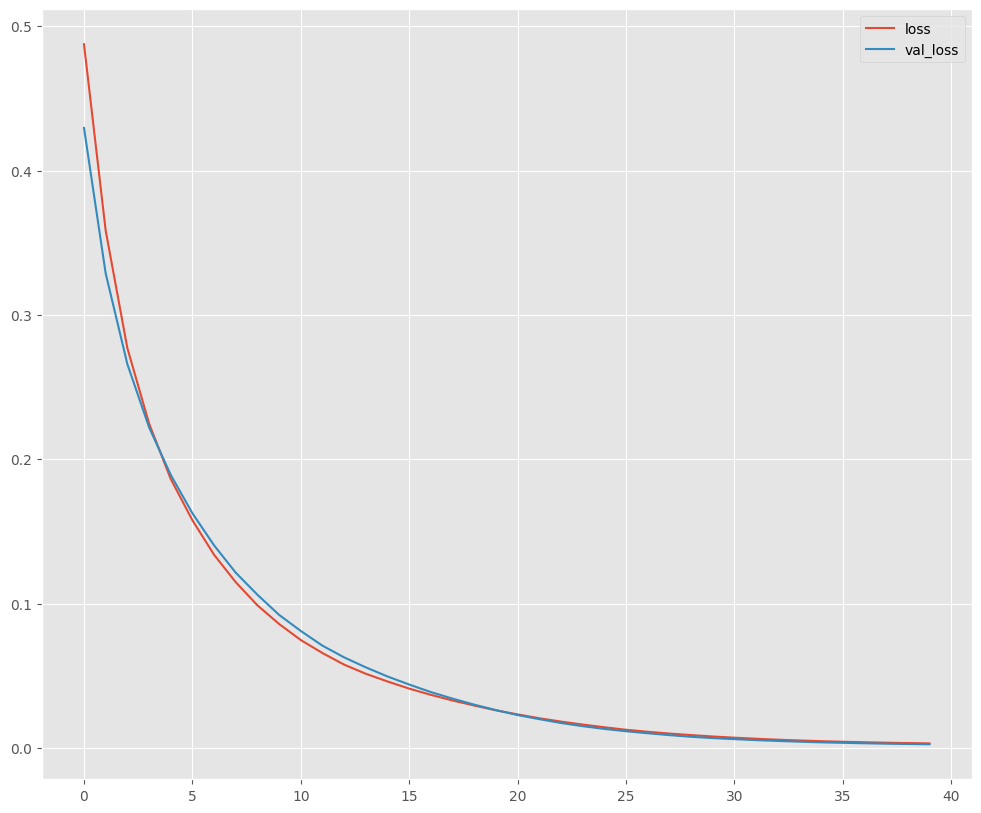

In [23]:
plt.style.use("ggplot")
pd.DataFrame(model_ann.history.history).plot(figsize=(12,10))

In [24]:
model_ann.evaluate(X_train,y_train)

25/25 [==============================] - 0s 1ms/step - loss: 0.0030


0.0029661881271749735

In [25]:
model_ann.evaluate(X_test,y_test)

7/7 [==============================] - 0s 1ms/step - loss: 0.0025


0.0024681114591658115

In [26]:
predictions = model_ann.predict(X_test)
predictions_df = pd.DataFrame(np.ravel(predictions),columns=["Predictions"])
comparison_df = pd.concat([pd.DataFrame(y_test,columns=["Real Values"]), predictions_df],axis=1)
comparison_df

7/7 [==============================] - 0s 1ms/step


,Real Values,Predictions
0,0.093467,0.082764
1,0.928755,0.902012
2,0.042753,0.068666
3,0.033793,0.036424
4,0.925289,0.961211
...,...,...
195,0.368909,0.391489
196,0.033739,-0.009797
197,0.076372,0.099632
198,0.978530,0.987458


In [27]:
print(y_test.shape)       # The actual values are 1D arrays
print(predictions.shape)  # The predictions are 2D arrays

(200,)
(200, 1)


In [29]:
print("----------MODEL ANN----------")
# We will evaluate our model performance by calculating the residual sum of squares and the explained variance score
print("MAE:",metrics.mean_absolute_error(y_test,predictions))
print ("MSE:",metrics.mean_squared_error(y_test,predictions))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,predictions)))

r2_squared_ann = r2_score(y_test, predictions)
# Cetak hasil evaluasi
print("R-squared:", r2_squared_ann)

print("------------------------------")

----------MODEL ANN----------
MAE: 0.03815823925061744
MSE: 0.0024681114015783724
RMSE: 0.049680090595512934
R-squared: 0.9831003930913376
------------------------------


In [30]:
#Evaluation of  the explained variance score (R^2)
predict = metrics.explained_variance_score(y_test,predictions) #This shows our model predict %93 of the target correctly

print("Nilai akurasi dari model : ", predict)

Nilai akurasi dari model :  0.9831030076994596


/tmp/ipykernel_7187/1465659108.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-predictions,bins=50) #this figure also proves that our model fits very good


<Axes: ylabel='Density'>

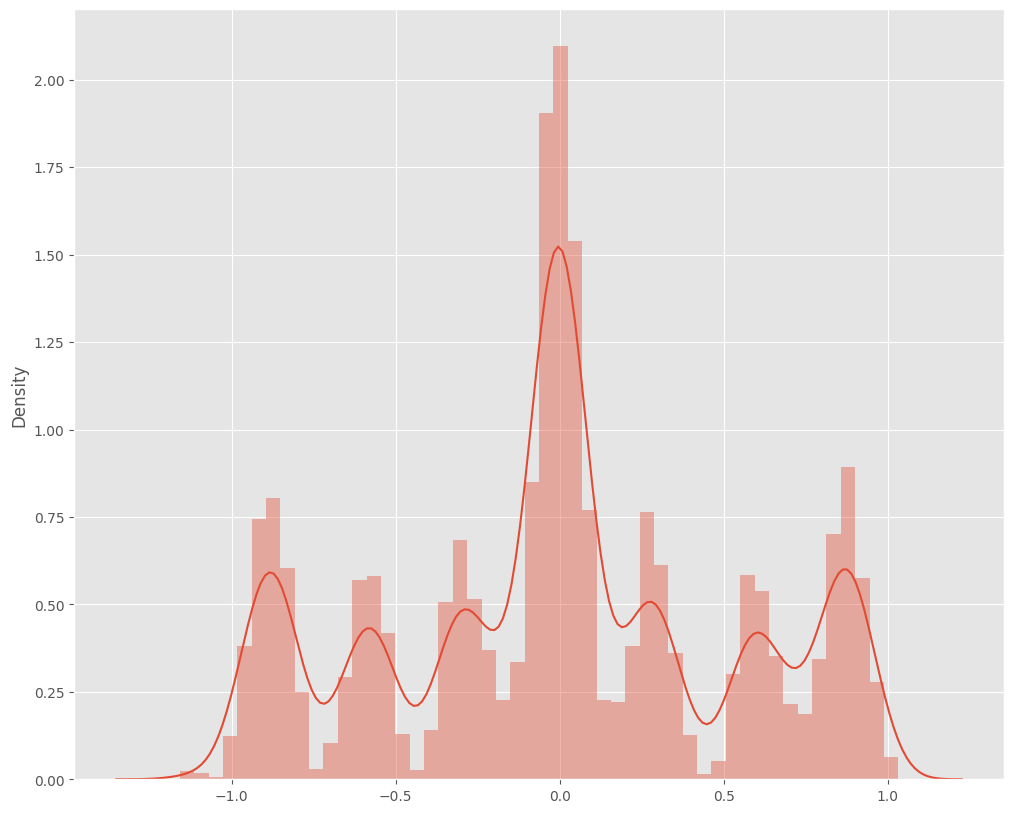

In [31]:
#Now we will visualize the differences between our predictions and actual y test data
plt.figure(figsize=(12,10))
sns.distplot(y_test-predictions,bins=50) #this figure also proves that our model fits very good
#There is no huge differences between our predictions and actual y data

### Comparing accuration between SVR model and ANN model

In [33]:
print("R-squared dari model SVR:", r_squared_svr)

# Cetak hasil evaluasi
print("R-squared dari model ANN:", r2_score(y_test, predictions))

R-squared dari model SVR: 0.9682939700117195
R-squared dari model ANN: 0.9831003930913376


Nilai akurasi untuk model yang melakukan proses regresi adalah R-squared. Dari kedua model tersebut, didapat bahwa nilai r-squared dari SVR lebih rendah yang berarti model ANN lebih baik dalam menyelesaikan prediksi harga laptop. 